Wine quality prediction using cross validation

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

%matplotlib inline

In [1]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
df=pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
#as all quality values in range 3-8
quality_mapping={3:0,4:1,5:2,6:3,7:4,8:5}

In [8]:
#map all the values
df.loc[:,"quality"]=df.quality.map(quality_mapping)

In [9]:
#Lets take 1000 smples for training
df=df.sample(frac=1).reset_index(drop=True);
#top 1000 for train data
df_train=df.head(1000);
df_test=df.tail(599)

In [14]:
#Train a decision tree model
from sklearn import tree
from sklearn import metrics

#decision tree with max depth 3
clf=tree.DecisionTreeClassifier(max_depth=3)
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [15]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
train_preds=clf.predict(df_train[cols]);
test_preds=clf.predict(df_test[cols]);
train_acc=metrics.accuracy_score(df_train.quality,train_preds);
test_acc=metrics.accuracy_score(df_test.quality,test_preds)

In [20]:
print("train acc",train_acc);
print("test_acc",test_acc)

train acc 0.569
test_acc 0.5792988313856428


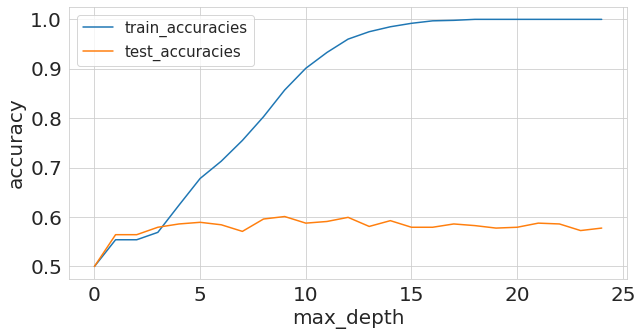

In [25]:
#same procedure with  differnt max depths

#global size of label text on plot
matplotlib.rc('xtick',labelsize=20);
matplotlib.rc('ytick',labelsize=20);

#initalize lists to store accuracies for training and test data we start with 50%
train_accuracies=[0.5]
test_accuracies=[0.5]

#iterate over few depth values
for depth in range(1,25):
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
  clf.fit(df_train[cols],df_train.quality);
  #create training n test preds
  train_preds=clf.predict(df_train[cols]);
  test_preds=clf.predict(df_test[cols]);

  #calc train n test acc
  train_acc=metrics.accuracy_score(df_train.quality,train_preds);
  test_acc=metrics.accuracy_score(df_test.quality,test_preds);

  #append accuracies
  train_accuracies.append(train_acc);
  test_accuracies.append(test_acc)

#create 2 plots

plt.figure(figsize=(10,5));
sns.set_style("whitegrid");
plt.plot(train_accuracies,label="train_accuracies")
plt.plot(test_accuracies,label="test_accuracies")
plt.legend(loc="upper left",prop={'size':15});
plt.xticks(range(0,26,5));
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20);
plt.show()